In [10]:
import pandas as pd

In [11]:
df_fields = pd.read_csv('../data/new_fields.csv', delimiter=';', decimal=',', skiprows=[0, 2])
df_value = pd.read_csv('../data/new_value.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['inv_item_date'], date_format={'inv_item_date': '%d.%m.%Y'})
df_works = pd.read_csv('../data/new_works.csv', delimiter=';', decimal=',', skiprows=[0, 1], parse_dates=['start_date', 'end_date'], date_format={'start_date': '%d.%m.%Y', 'end_date': '%d.%m.%Y'})

df_works['area'] = df_works['area'].str.replace(',', '.').astype(float)

In [12]:
df_works_tmp = df_works[['work_type', 'work_subtype', 'yield_fact']]

df_works_tmp.head()

,work_type,work_subtype,yield_fact
0,Обработка почвы,Боронование,0.0
1,Обработка почвы,Боронование,0.0
2,Обработка почвы,Боронование,0.0
3,Обработка почвы,Боронование,0.0
4,Обработка почвы,Боронование,0.0


In [13]:
work_types = list(df_works_tmp['work_type'].unique())

work_types.remove('Уборка')
work_types

['Обработка почвы', 'Внесение СЗР', 'Внесение удобрений', 'Сев']

In [14]:
import matplotlib.pyplot as plt

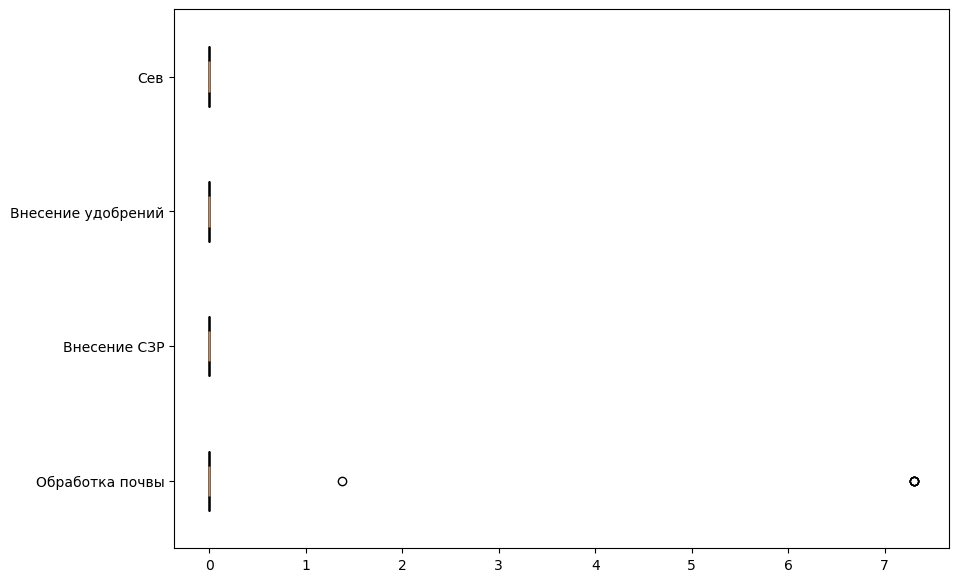

In [15]:
data = [df_works_tmp[df_works_tmp['work_type'] == i]['yield_fact'] for i in work_types]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
    
# x-axis labels
ax.set_yticklabels(work_types)

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
# show plot
plt.show()

In [16]:
df_works_tmp = df_works[df_works['work_type'] == 'Уборка'][['work_subtype', 'yield_fact']]

df_works_tmp.head()

,work_subtype,yield_fact
5322,Уборка трав,0.29
5323,Уборка трав,0.29
5324,Уборка трав,0.20
22435,Прессование,0.00
23032,Прессование,0.00


In [17]:
work_subtypes = list(df_works_tmp['work_subtype'].unique())

work_subtypes

['Уборка трав',
 'Прессование',
 'Сгребание в валки',
 'Вывоз',
 'Кошение',
 'Подбор (корм)',
 'Ворошение',
 'Уборка силос/карнаж',
 'Подбор',
 'Заготовка сенажа',
 'Подбор и обмолот',
 'Прямое комбайнирование',
 'Вывоз (тех.культуры)',
 'Копка']

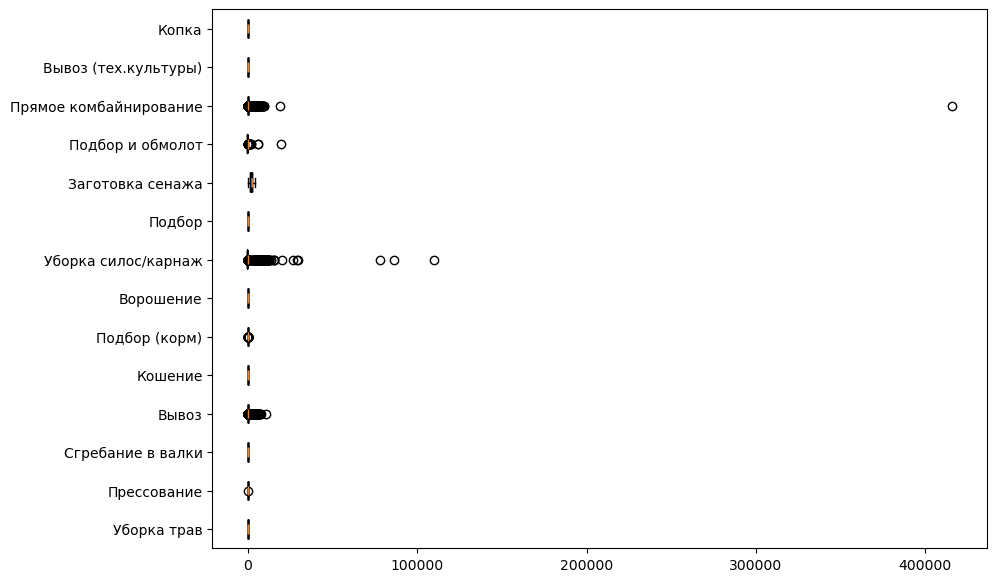

In [18]:
data = [df_works_tmp[df_works_tmp['work_subtype'] == i]['yield_fact'] for i in work_subtypes]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
    
# x-axis labels
ax.set_yticklabels(work_subtypes)

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
# show plot
plt.show()

In [20]:
valid_work_subtypes = ['Прямое комбайнирование', 'Подбор и обмолот', 'Заготовка сенажа', 'Уборка силос/карнаж', 'Подбор (корм)', 'Вывоз', 'Прессование']

In [25]:
df_yield_fact = df_works.query(f"work_type == 'Уборка' and work_subtype in {valid_work_subtypes}")[['season', 'field', 'yield_fact', 'area', 'work_subtype']]
# df_yield_fact = df_yield_fact.groupby(by=['field', 'season']).sum().reset_index()

df_yield_fact.head()

,season,field,yield_fact,area,work_subtype
22435,2023,56.28.07.003.00,0.0,40.0,Прессование
23032,2023,56.28.07.003.00,0.0,41.0,Прессование
23517,2023,56.28.07.003.00,0.0,40.0,Прессование
24014,2023,56.28.07.003.00,0.0,6.0,Прессование
24545,2023,56.28.07.003.00,0.0,3.0,Прессование


In [23]:
df_yield_fact['work_subtype'].value_counts()

work_subtype
Прямое комбайнирование    23371
Кошение                    8185
Вывоз                      7520
Уборка силос/карнаж        5577
Подбор (корм)              5395
Сгребание в валки          3879
Прессование                2483
Подбор и обмолот            791
Подбор                      618
Копка                       495
Ворошение                   376
Вывоз (тех.культуры)        306
Заготовка сенажа             98
Уборка трав                   3
Name: count, dtype: int64